<a href="https://colab.research.google.com/github/KatyaKatyaKatyaSSS/DKR-1/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №5
## Первичный и разведочный анализ данных
Созина Екатерина ИСПК 402


### Задание
1. Изучить теоретический материал (*см. вложенный .pdf файл, стр. 9 - 14*)
2. Выполнить задания из файла (*стр. 13*)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# **1. Создание выборок данных (n > 20)**
Создадим две выборки x и y, где y линейно зависит от x с добавлением шума:

In [1]:
import numpy as np

np.random.seed(42)
x = np.random.normal(50, 10, 30)  # 30 значений с нормальным распределением
y = 3 * x + np.random.normal(0, 15, 30)  # Линейная зависимость + шум

print("Выборка x:", x)
print("Выборка y:", y)


Выборка x: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625 47.65863043
 65.79212816 57.67434729 45.30525614 55.42560044 45.36582307 45.34270246
 52.41962272 30.86719755 32.75082167 44.37712471 39.8716888  53.14247333
 40.91975924 35.87696299 64.65648769 47.742237   50.67528205 35.75251814
 44.55617275 51.1092259  38.49006423 53.75698018 43.9936131  47.0830625 ]
Выборка y: [155.87582541 173.63624373 169.22819777 179.82523176 155.31357244
 124.66323654 200.50933839 143.62799002 115.99297769 169.22971985
 147.17446792 138.59863161 155.52414391  88.08503723  76.07463517
 122.333711   112.70548483 175.28425337 127.91355208  81.18528663
 198.83072261 137.45047678 141.87201614 116.43269875 149.1335111
 167.29687948 102.88192983 156.63275491 136.94979077 155.88236441]


Здесь x — случайные значения, а y пропорционально x с добавлением случайного шума.

# **2. Графическое отображение данных и проверка выбросов**
Построим ящичковый график и вычислим выбросы с помощью IQR:

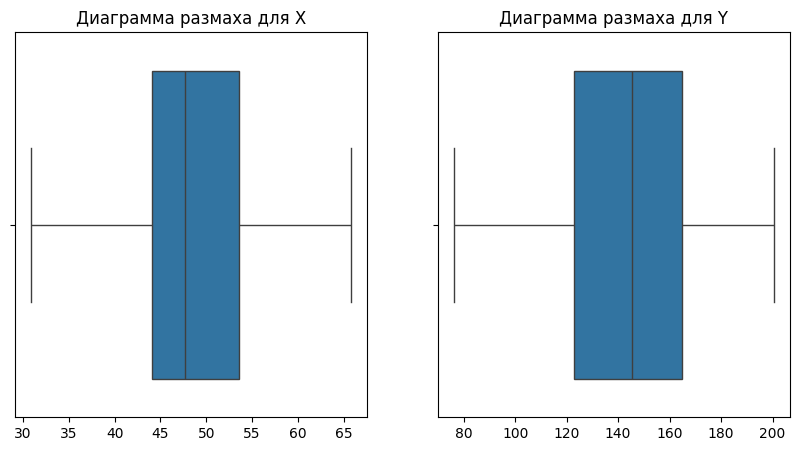

Границы выбросов для X: (29.818697302645234, 67.87414716894202)
Границы выбросов для Y: (60.343958452799086, 227.20298226700805)
Выбросы в X: []
Выбросы в Y: []


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=x)
plt.title("Диаграмма размаха для X")

plt.subplot(1, 2, 2)
sns.boxplot(x=y)
plt.title("Диаграмма размаха для Y")

plt.show()

# Вычисление межквартильного расстояния (IQR)
Q1_x, Q3_x = np.percentile(x, [25, 75])
IQR_x = Q3_x - Q1_x
lower_x, upper_x = Q1_x - 1.5 * IQR_x, Q3_x + 1.5 * IQR_x

Q1_y, Q3_y = np.percentile(y, [25, 75])
IQR_y = Q3_y - Q1_y
lower_y, upper_y = Q1_y - 1.5 * IQR_y, Q3_y + 1.5 * IQR_y

print(f"Границы выбросов для X: ({lower_x}, {upper_x})")
print(f"Границы выбросов для Y: ({lower_y}, {upper_y})")

# Поиск выбросов
outliers_x = x[(x < lower_x) | (x > upper_x)]
outliers_y = y[(y < lower_y) | (y > upper_y)]

print("Выбросы в X:", outliers_x)
print("Выбросы в Y:", outliers_y)


# **3. Построение облака точек и анализ связи между переменными**

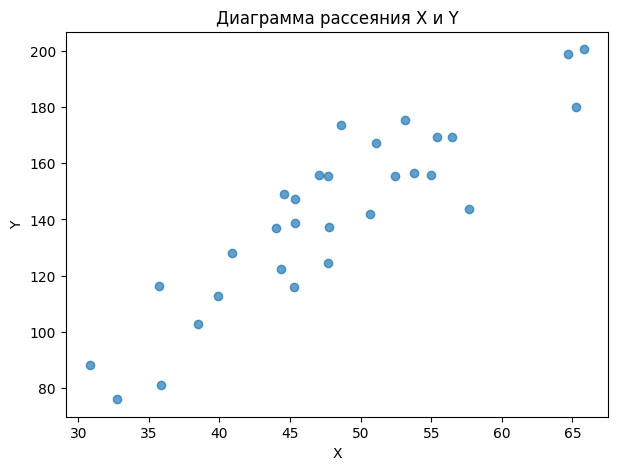

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Диаграмма рассеяния X и Y")
plt.show()


# **Вывод:**
Если точки на графике расположены вдоль линии, можно предположить наличие линейной зависимости.

In [4]:
correlation = np.corrcoef(x, y)[0, 1]
print(f"Коэффициент корреляции Пирсона: {correlation:.3f}")


Коэффициент корреляции Пирсона: 0.898
